In [131]:
import pandas as pd

df = pd.read_csv('data/합계출산율_전국.csv')
df.head(),df.tail()

(  지역별    시점    출생아수  합계출산율
 0  전국  2000  640089  1.480
 1  전국  2001  559934  1.309
 2  전국  2002  496911  1.178
 3  전국  2003  495036  1.191
 4  전국  2004  476958  1.164,
    지역별    시점    출생아수  합계출산율
 19  전국  2019  302676  0.918
 20  전국  2020  272337  0.837
 21  전국  2021  260562  0.808
 22  전국  2022  249186  0.778
 23  전국  2023  230028  0.721)

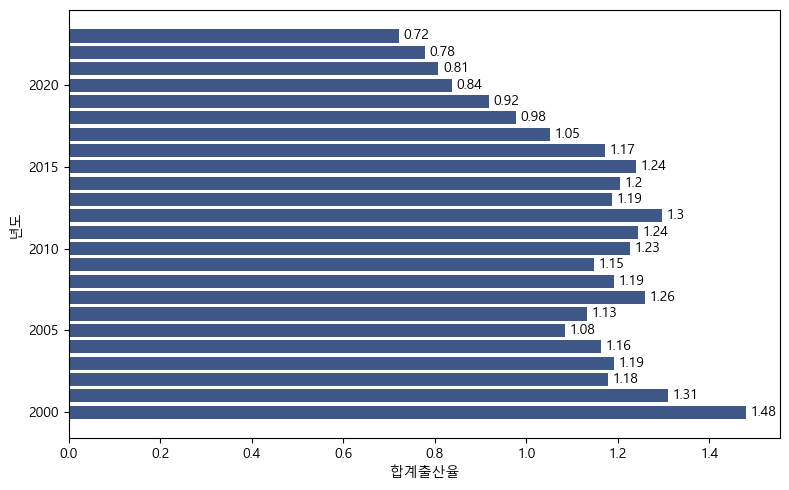

In [132]:
import matplotlib.pyplot as plt

# 폰트 깨짐 해결
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 5))

rgba_color = (0/255, 32/255, 96/255, 0.75)
bars = plt.barh(df['시점'], df['합계출산율'], color=rgba_color, label='합계출산율')

# 각 막대 옆에 값 표시 (막대 위쪽으로 이동)
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
             round(bar.get_width(), 2), ha='left', va='center')

# 축 설정
plt.xlabel('합계출산율')
plt.ylabel('년도')

# 그래프 표시
plt.tight_layout()
plt.show()

In [133]:
# 시점 변환
df['시점'] = pd.to_datetime(df['시점'], format='%Y', errors='coerce')

# 지역별 숫자형으로 변환
df['출생아수'] = pd.to_numeric(df['출생아수'], errors='coerce')
df['합계출산율'] = pd.to_numeric(df['합계출산율'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지역별     24 non-null     object        
 1   시점      24 non-null     datetime64[ns]
 2   출생아수    24 non-null     int64         
 3   합계출산율   24 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 900.0+ bytes


In [134]:
# 월별 데이터 프레임 생성
yearly_data = df.set_index('시점')

# 리샘플링
monthly_df = yearly_data.resample('ME').agg({'출생아수': 'mean', '합계출산율': 'mean'})  

# 보간
monthly_df = monthly_df.interpolate(method='linear')

# NaN 값 처리 (여기서는 NaN을 0으로 채움)
monthly_df.fillna(0, inplace=True)

# 시점 다시 설정
monthly_df.reset_index(inplace=True)

# '시점'이 datetime인지 확인 후, 형식 변경
if pd.api.types.is_datetime64_any_dtype(monthly_df['시점']):
    monthly_df['시점'] = monthly_df['시점'].dt.strftime('%Y.%m')

# 지역별 컬럼 추가 (여기서는 첫 번째 지역을 사용)
monthly_df['지역별'] = df['지역별'].iloc[0]  # 필요에 따라 수정 가능
monthly_df = monthly_df.drop(columns=['출생아수'])

monthly_df.head(12), monthly_df.shape

# # 데이터 저장
# monthly_df.to_csv('monthly_sum.csv', index=False)


(         시점    합계출산율 지역별
 0   2000.01  1.48000  전국
 1   2000.02  1.46575  전국
 2   2000.03  1.45150  전국
 3   2000.04  1.43725  전국
 4   2000.05  1.42300  전국
 5   2000.06  1.40875  전국
 6   2000.07  1.39450  전국
 7   2000.08  1.38025  전국
 8   2000.09  1.36600  전국
 9   2000.10  1.35175  전국
 10  2000.11  1.33750  전국
 11  2000.12  1.32325  전국,
 (277, 3))